# Проверка гипотез по увеличению выручки интернет-магазина
_____

**Описание проекта**
_____
Для интернет-магазина был подготовлен список гипотез для увеличения выручки.

Нужно приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.
_____
**Цель проекта**
В данном исследовании основной целью является определение наиболее перспективных гипотез, а также для анализа результатов А/В тестирования и принятия решения по его результатам.
_____
**Задачи проекта**

Для достижения поставленной цели будет необходимо:
1. Изучить общую информацию о данных, выявить проблемы
2. Подготовить данные к анализу
3. Приоритизировать гипотезы
- *Применить фреймворк ICE;*
- *Применить фреймворк RICE;*
- *Выявить изменение приоритизации гипотез при применении RICE вместо ICE;*
4. Анализ A/B-теста
- *Построить график кумулятивной выручки по группам. Сделать выводы и предположения.;*
- *Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.;*
- *Построить график относительного изменения кумулятивного среднего чека группы B к группе A.Сделать выводы и предположения.;*
- *Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.;*
- *Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.;*
- *Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.;*
- *Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей;*
- *Построить точечный график стоимостей заказов. Сделать выводы и предположения.;*
- *Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.;*
- *Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.;*
- *Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.;*
- *Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.;*
- *Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.;*
- *Принять решение по результатам теста;*
_____

**Исходные данные**

1) *Файл /datasets/hypothesis.csv*

- Hypothesis — краткое описание гипотезы;

- Reach — охват пользователей по 10-балльной шкале;

- Impact — влияние на пользователей по 10-балльной шкале;

- Confidence — уверенность в гипотезе по 10-балльной шкале;

- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

2) *Файл /datasets/orders.csv*

- transactionId — идентификатор заказа;

- visitorId — идентификатор пользователя, совершившего заказ;

- date — дата, когда был совершён заказ;

- revenue — выручка заказа;

- group — группа A/B-теста, в которую попал заказ.

3) *Файл /datasets/visitors.csv*

- date — дата;

- group — группа A/B-теста;

- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

**План проекта:**
_____
<a href='#section1'>1. Загрузка данных и подготовка к анализу</a>

<a href='#section2'>2. Приоритезация гипотез</a>

<a href='#section3'>2.1. Фреймворк ICE</a>

<a href='#section4'>2.2. Фреймворк RICE</a>

<a href='#section5'>2.3. Выявление изменений в приоритизации гипотез</a>

<a href='#section6'>3. Анализ А/В теста</a>

<a href='#section7'>3.1. Кумулятивная выручка по группам</a>

<a href='#section8'>3.2. Кумулятивный средний чек по группам</a>

<a href='#section9'>3.3. Относительное изменение кумулятивного среднего чека группы B к группе A</a>

<a href='#section10'>3.4. Кумулятивная конверсия по группам</a>

<a href='#section11'>3.5. Относительное изменение кумулятивной конверсии группы B к группе A</a>

<a href='#section12'>3.6. Количество заказов по пользователям</a>

<a href='#section13'>3.7. Граница для определения аномальных пользователей</a>

<a href='#section14'>3.8. Стоимость заказов</a>

<a href='#section15'>3.9. Границу для определения аномальных заказов</a>

<a href='#section16'>3.10. Статистическая значимость различий в конверсии между группами по «сырым» данным</a>

<a href='#section17'>3.11. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным</a>

<a href='#section18'>3.12. Статистическая значимость различий в конверсии между группами по «очищенным» данным</a>

<a href='#section19'>3.13. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным</a>

<a href='#section20'>3.14. Выводы по результатам теста</a>
_____

<a id='section1'></a>
## 1. Загрузка данных и подготовка к анализу

In [1]:
# импорт библиотек
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats
from datetime import datetime, timedelta
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()



In [2]:
# чтение файлов с данными и запись в соответствующие переменные
hypothesis, orders, visitors = (
pd.read_csv('/datasets/hypothesis.csv'), 
pd.read_csv('/datasets/orders.csv'),
pd.read_csv('/datasets/visitors.csv')
)

pd.set_option('display.max_colwidth', 1000)
# выведем на экран датафреймы, чтобы познакомиться  сданными
display(hypothesis, orders.head(5), visitors.head(5))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [3]:
# выведем общую информацию о данных, чтобы убедиться, что тип данных во всех колонках соотвествующий
list_1 = [hypothesis, orders, visitors]
[i.info() for i in list_1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   

[None, None, None]

Видно, что тип данных в столбцах с датами в каждом из фреймов "object" - потребуется преобразование в datetime.

Также переименуем названия столбцов - приведем к нижнему регистру.

In [4]:
# приведем названия столбцов к нижнему регистру
for j in list_1:
    j.columns = j.columns.str.lower()


In [5]:
# преобразование данных о времени
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Проверим наличие пропусков и дубликатов

In [6]:
# проверка пропусков методом isna()
[i.isna().sum() for i in list_1]

[hypothesis    0
 reach         0
 impact        0
 confidence    0
 efforts       0
 dtype: int64,
 transactionid    0
 visitorid        0
 date             0
 revenue          0
 group            0
 dtype: int64,
 date        0
 group       0
 visitors    0
 dtype: int64]

In [7]:
# подсчет дубликатов
[i.duplicated().sum() for i in list_1]

[0, 0, 0]

Названия столбцов были приведены к нижнему регистру, даты переведы в формат datetime. Пропусков и дубликатов в данных не обнаружено.
Таким образом, данные готовы к анализу.

<a id='section2'></a>
## 2. Приоритизация гипотез

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
<a id='section3'></a>
**2.1. Применим фреймворк ICE для приоритизации гипотез**



In [8]:
# посчитаем ice для гипотез
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

# выведем на экран гипотезы, отсортированные по убыванию приоритета
hypothesis.sort_values(by='ICE', ascending=False)[['hypothesis', 'ICE']]

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Пока гипотеза "*Запустить акцию, дающую скидку на товар в день рождения*" выглядит самой перспективной.

<a id='section4'></a>
**2.2. Применим фреймворк RICE для приоритизации гипотез**

In [9]:
# посчитаем rice для гипотез
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

# выведем на экран гипотезы, отсортированные по убыванию приоритета
hypothesis.sort_values(by='RICE', ascending=False)[['hypothesis', 'RICE']]

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


<a id='section5'></a>
**2.3. Выявление изменений в приоритизации гипотез**

При применении фреймворка RICE приоритезация гипотез изменилась, теперь в приоритете гипотеза "*Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*". Это связано с тем, что фреймворк RICE состоит из четырёх компонент, в отличие от ICE он учитывет еще и охват, т.е. скольких пользователей затронет изменение, которое мы хотим внести.

<a id='section6'></a>
## 3. Анализ A/B-теста

Был проведен A/B-тест и получены результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Перед анализом A/B-теста проверим корректность разбиения пользователей на группы:

In [10]:
# передадим функции np.intersect1d 2 массива, она вернет те значения, которые встречаются в обоих массивах
duplicate_visitor = np.intersect1d(orders.query('group == "A"')['visitorid'].unique(), orders.query('group == "B"')['visitorid'].unique())
duplicate_visitor

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

Мы обнаружили, пользователей, которые встречаются и в группе А и в группе В, посчитаем долю таких пользователей.


In [11]:
# посчитаем долю повторяющихся в обеих группах пользователей
duplicate_visitor_ratio = (len(duplicate_visitor) / orders['visitorid'].nunique())*100
round(duplicate_visitor_ratio,2)


5.63

<a id='section7'></a>
**3.1. Кумулятивная выручка по группам**

Построим график кумулятивной выручки по группам.

In [12]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups  = orders[['date','group']].drop_duplicates() 

In [13]:
# cоберём агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionid': pd.Series.nunique,
            'visitorid': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

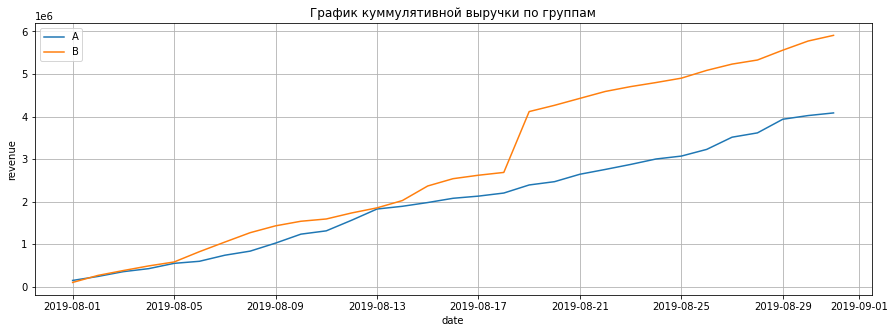

In [14]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График куммулятивной выручки по группам')
plt.xlabel('date')
plt.ylabel('revenue')
plt.grid()
plt.legend(); 

Выручка в обоих группах равномерно увеличивается, но группа В все же лидирует, выручка в этой группе практически на протяжении всего теста выше.

<a id='section8'></a>
**3.2. Кумулятивный средний чек по группам.**

Построим график кумулятивного среднего чека по группам.

Чтобы построить графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

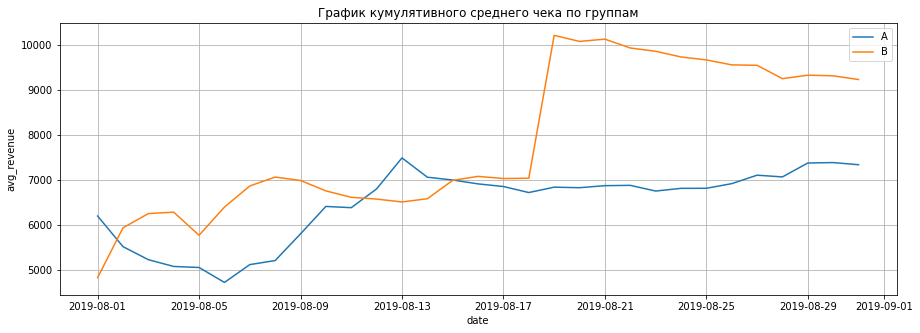

In [15]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('date')
plt.ylabel('avg_revenue')
plt.grid()
plt.legend(); 

Среедний чек в группе В также выше чем в группе А, а в середине теста наблюдается резкий скачок и значения в группе В уже значительно превышают значения в группе А. Возможно, в группу В попали крупные заказы (резкий всплеск на графике). 

<a id='section9'></a>
**3.3. Относительное изменение кумулятивного среднего чека группы B к группе A.**

Построим график относительного изменения кумулятивного среднего чека группы B к группе A.


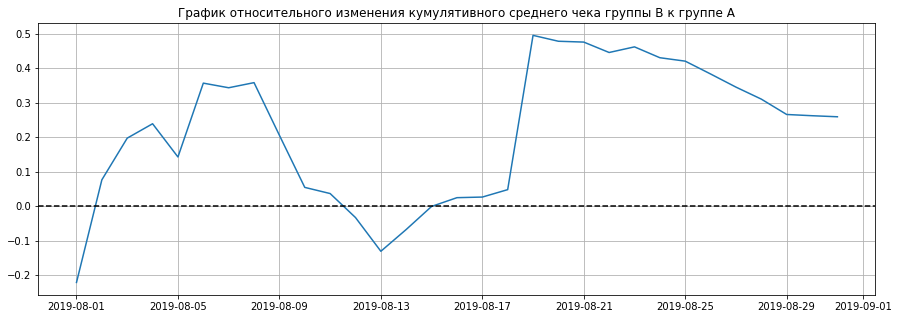

In [16]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.grid()
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--'); 

В нескольких точках можно наблюдать значительные скачки показателя прироста среднего чека по группе В по сравнению с группой А, похоже что в данных есть какие-то выбросы и крупные заказы.

<a id='section10'></a>
**3.4. Кумулятивная конверсия по группам.**

Построим график кумулятивной конверсии по группам.

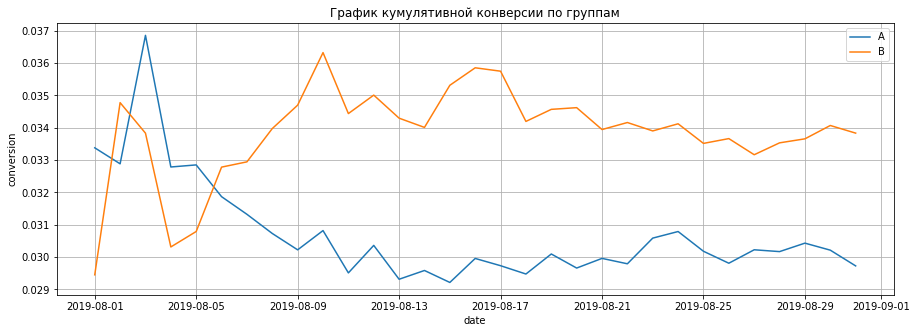

In [17]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('date')
plt.ylabel('conversion')
plt.grid()
plt.legend();



В начале теста конверсия в группе В была заметно меньше, но затем видно, что конверсия группы А достаточно резко начала снижаться и уже с середины и до конца теста конверсия группы В была значительно выше.

<a id='section11'></a>
**3.5. Относительное изменение кумулятивной конверсии группы B к группе A.**

Построим график относительного изменения кумулятивной конверсии группы B к группе A.

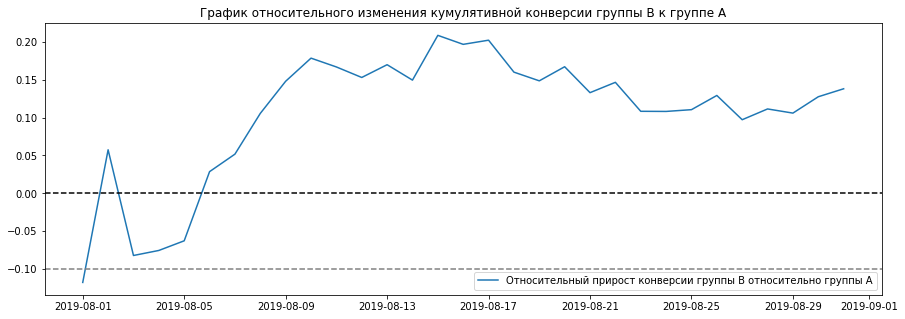

In [18]:
# объединяем данные в один фрейм
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# строим график
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--');

Лишь в самом начале теста группа В проигрывала группе А, затем она продемонстрировала заметный рост и зафиксировалась около прироста в 20% относительно группы А и сохранила эти позиции до конца теста с небольшим снижением.

<a id='section12'></a>
**3.6. Количество заказов по пользователям**

Построим точечный график количества заказов по пользователям.

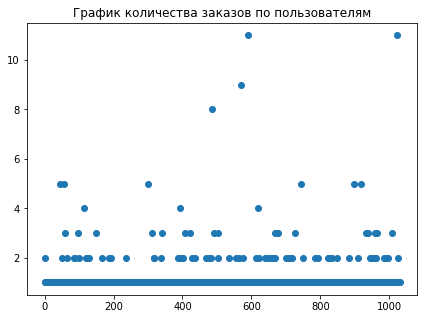

In [19]:
# сгруппируем данные по пользователям и подсчитаем количество заказов
ordersByUsers = orders.groupby('visitorid', as_index=False).agg({'transactionid':pd.Series.nunique})
ordersByUsers.columns = ['userId', 'orders']

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
# построим диаграмму методом Scatter
plt.figure(figsize=(7,5))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График количества заказов по пользователям');

В основном все пользователи делают по 1 заказу. Пользователей, заказавших более двух раз, слвсем мало. Они вполне могут быть аномальными. Далее, чтобы ответить на вопрос 2 заказа это нормально или много, посчитаем выборочные перцентили.

<a id='section13'></a>
**3.7. Граница для определения аномальных пользователей.**

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [20]:
# посчитаем перцентили методом np.percentile()
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Видим, что не более 5% пользователей совершали больше двух заказов и не более 1% пользователей - больше 4-х заказов.

<a id='section14'></a>
**3.8. Стоимость заказов.** 

Построим точечный график стоимостей заказов.

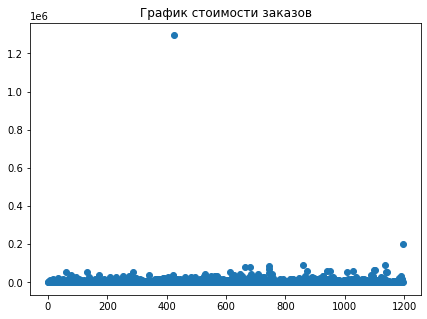

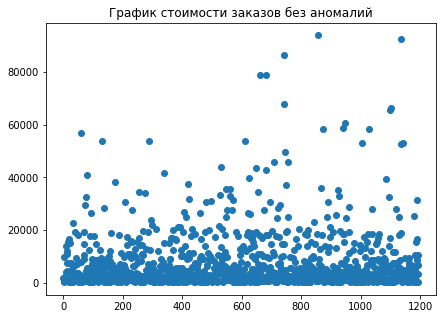

In [21]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(orders['revenue'])))
# построим диаграмму методом Scatter
plt.figure(figsize=(7,5))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимости заказов')
plt.show()
# исключим аномалии из графика
new_orders = orders.query('revenue<200000')
# построим диаграмму методом Scatter без аномалий
plt.figure(figsize=(7,5))
x_values = pd.Series(range(0, len(new_orders['revenue'])))
plt.scatter(x_values, new_orders['revenue'])
plt.title('График стоимости заказов без аномалий')
plt.show()

Теперь видно, что заказов стоимостью более 20 000 руб. не много. Есть выбросы в райное 30 000 - 80 000 рублей. Посмотрим на выборочные перцентили.

<a id='section15'></a>
**3.9. Границу для определения аномальных заказов.**

Посчитаем 95-й и 99-й перцентили стоимости заказов и выберем границу для определения аномальных заказов.

In [22]:
# посчитаем перцентили методом np.percentile()
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более, чем у 5% заказов чек дороже 28 000 руб. и не больше, чем у 1% заказов - дороже 58 233 руб. Значит можно считать аномально большими заказы дороже 28 000 руб.

<a id='section16'></a>
**3.10. Статистическая значимость различий в конверсии между группами по «сырым» данным.**

Посчтаем статистическую значимость различий в конверсии между группами по «сырым» данным.

Для анализа статистической значимости воспользуемся криетрием Манна-Уитни.

Сформулируем нулевую гипотезу для проверки:

*Но=группы статистически не различаются*

Альтернативная гипотеза:

*Н1 = есть статистически значимое различие между группами*

Уровень стат.значимости примем за 0,05.



In [23]:
# подготовим выборки для проверки критерием Манна-Уитни
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']


usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 10000]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
# применим критерий Манна-Уитни и отформатируем p-value, округлив его до трёх знаков после запятой
print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
# выведем относительный прирост конверсии группы B
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.00896
0.205


P-value меньше 0.05, а значит конверсия между группами различается,т.е.мы принимаем альтернативную гипотезу, также видим, что относительный прирост конверсии группы В составил 20,5%.

<a id='section17'></a>
**3.11. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.**

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [24]:
# передадим критерию mannwhitneyu() данные о выручке с заказов
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
# найдём относительные различия в среднем чеке между группами
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


P-value больше уровня значимости,значит нулевую гипотезу мы принимаем, никаких отличий между группами нет. Наблюдаемое различие -выигрыш группы В - 25,9% не является статистически значимым.

<a id='section18'></a>
**3.12. Статистическую значимость различий в конверсии между группами по «очищенным» данным.**

Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. 

Ранее,рассчитав 95 и 99 перцентили, мы выяснили, что  не более 5% пользователей совершали больше 2-х заказов и не более 1% пользователей - больше 4-х заказов и не более, чем у 5% заказов чек дороже 28 000 руб. и не больше, чем у 1% заказов - дороже 58 233 руб. 

Возьмем границу в 95% - примем за аномальных пользователей, которые совершили больше 2 заказов или заказали на сумму выше 28 000 руб.

In [25]:
# cделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders
# и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

# посчитаем количество аномальных пользователей
print(abnormalUsers.shape) 


(74,)


Всего аномальных пользователей 74.

Чтобы узнать, как их действия повлияли на результат посчитаем различие в конверсии между группами по очищенным данным.

In [26]:
# подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
# применим статистический критерий Манна-Уитни к полученным выборкам
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.013
0.173


Результат не сильно отличается от того, что был по сырым данным, полученное значение p-value говорит о том, что есть статистичски значимое различия в конверсиях в группах А и В, т.е. нулевую гипотезу мы отвергаем и принимаем альтернативную . Разница между группами снизилась с 20,5% до 17,3%.

<a id='section19'></a>
**3.13. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.**

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [27]:
# передадим критерию Манна-Уитни значения выручки
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.738
-0.020


P-value практически не изменился, статистическая значимость достигнута - различий в группах нет, а вот значение прироста среднего чека по группе В стало гораздо хуже после очистки данных от выбросов.


<a id='section20'></a>
**3.14. Выводы по результатам теста**

- Конверсия группы В как по "сырым", так и по "очищенным" данным превышает конверсию группы А, причем это различие статистически значимо, т.е. обнаруженный прирост группы В - не случайность.

- Статистически значимой разницы в среднем чеке по ни по "сырым", ни по "очищенным" данным нет, можем также сделать вывод, что обнаруженный прирост по группе В в 25,9% был связан с аномальными значениями в данных, возможно, это были какие-то разовые крупные заказы, как только из данных убрали выбросы, прирост среднего чека в группе В срузу стал отрицательным.

- График различия конверсии между группами сообщает, что результаты группы B лучше группы A и уже после 5 дня теста это стабильная тенденция - прирост конверсии группы В на 10-20%.

- График различия среднего чека колеблется, выводы определенные сделать по нему сложно, но видно, что есть наличие аномалий в данных.

На основании полученных результатов можно признать тест успешным и остановить его, т.к. он выявил, что внедренное изменение не привело к увеличению среднего чека, а вот конверсия явно увеличилась. Поэтому в качестве рекомендации для бизнеса, можно сказать о том, что стоит посмотреть на другие метрики, например, на изменение количества заказов,возможно там можно будет увидеть причины по которым конверсия стала выше, а вот средний чек не поменялся.